In [90]:
# ESSdata_Thinkful.csv

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats as stats
%matplotlib inline

In [91]:
data = pd.read_csv('ESSdata_Thinkful.csv')
data.head()
data = data.fillna(data.median())

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8594 non-null float64
ppltrst    8594 non-null float64
pplfair    8594 non-null float64
pplhlp     8594 non-null float64
happy      8594 non-null float64
sclmeet    8594 non-null float64
sclact     8594 non-null float64
gndr       8594 non-null float64
agea       8594 non-null float64
partner    8594 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
Ttest_indResult(statistic=-0.36299921565336934, pvalue=0.7166638535739369)
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
Ttest_indResult(statistic=2.4753492215819755, pvalue=0.013378482103016485)
Ttest_indResult(statistic=0.5437217006496845, pvalue=0.586716009174931)
Ttest_indResult(statistic=-2.0928226022748118, pvalue=0.03650361699245728)


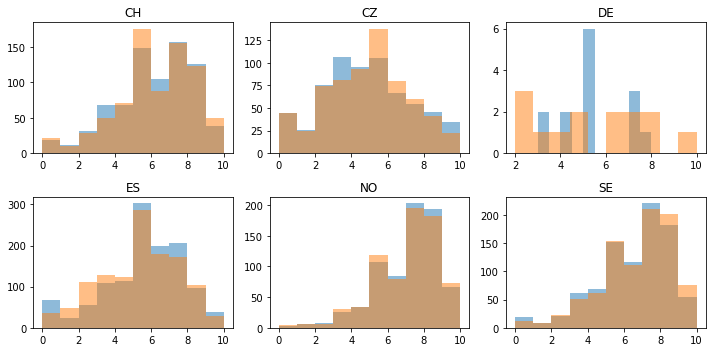

In [93]:
trust_6 = data[data['year']==6]['ppltrst']
trust_7 = data[data['year']==7]['ppltrst']

cn = data.cntry.unique()
plt.figure(figsize=(10,5))
for c in range(0,len(cn)):
    plt.subplot(2,3,c+1)
    plt.hist(data[(data['year']==6) & (data['cntry']==cn[c])]['ppltrst'], alpha=0.5)
    plt.hist(data[(data['year']==7) & (data['cntry']==cn[c])]['ppltrst'], alpha=0.5)
    plt.title(cn[c])
    plt.tight_layout()
    print(stats.ttest_ind(data[(data['year']==6) & (data['cntry']==cn[c])]['ppltrst'],
                          data[(data['year']==7) & (data['cntry']==cn[c])]['ppltrst']))
    

#### There are two countries(ES and SE) that showed differences of the people's trust, since the p_value is less than 0.05. T_test were used, since the distribution close to normal distribution.

KruskalResult(statistic=0.244083347141573, pvalue=0.6212723372583304)
KruskalResult(statistic=1.1696896592743875, pvalue=0.27946501634100207)
KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)
KruskalResult(statistic=4.089162593631455, pvalue=0.04315902004796964)
KruskalResult(statistic=18.877181680055934, pvalue=1.3941031229053593e-05)
KruskalResult(statistic=0.04913743840823105, pvalue=0.8245710499149336)


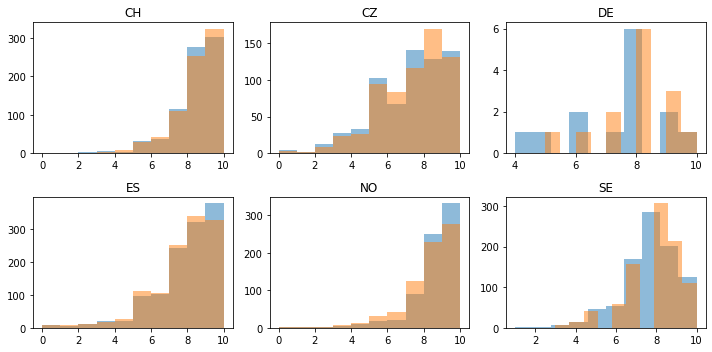

In [95]:
trust_6 = data[data['year']==6]['happy']
trust_7 = data[data['year']==7]['happy']

cn = data.cntry.unique()
plt.figure(figsize=(10,5))
for c in range(0,len(cn)):
    plt.subplot(2,3,c+1)
    plt.hist(data[(data['year']==6) & (data['cntry']==cn[c])]['happy'], alpha=0.5)
    plt.hist(data[(data['year']==7) & (data['cntry']==cn[c])]['happy'], alpha=0.5)
    plt.title(cn[c])
    plt.tight_layout()
    print(stats.kruskal(data['happy'][(data['year']==6) & (data['cntry']==cn[c])],
                         data['happy'][(data['year']==7) & (data['cntry']==cn[c])]))

#### Since the distribution is non-parametric, so kruskal methods were used to test if there is a different between two groups. From the result, ES and NO has showed diferences between two years

3.8319463707813224
3.8926897844423616
KruskalResult(statistic=2.0709993712367383, pvalue=0.15012312105499231)


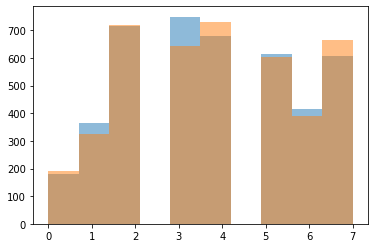

In [103]:
plt.hist(data['tvtot'][data['gndr']==1], alpha=0.5)
plt.hist(data['tvtot'][data['gndr']==2], alpha=0.5)
print(data['tvtot'][data['gndr']==1].mean())
print(data['tvtot'][data['gndr']==2].mean())
print(stats.kruskal(data['tvtot'][data['gndr']==1],data['tvtot'][data['gndr']==2]))

#### There is no significant difference between two genders, and the data is non-parametric

6.082431928384931
5.857673267326732
Ttest_indResult(statistic=3.3526650393131754, pvalue=0.0008073002028865902)


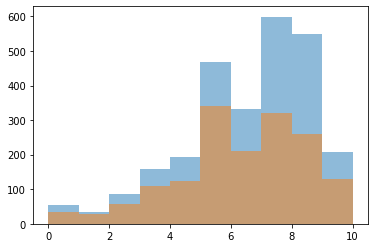

In [108]:
plt.hist(data['pplfair'][(data['partner']==1.0)&(data['year']==6)], alpha=0.5)
plt.hist(data['pplfair'][(data['partner']==2.0)&(data['year']==6)], alpha=0.5)
print(data['pplfair'][(data['partner']==1.0)&(data['year']==6)].mean())
print(data['pplfair'][(data['partner']==2.0)&(data['year']==6)].mean())
print(stats.ttest_ind(data['pplfair'][(data['partner']==1.0)&(data['year']==6)],data['pplfair'][(data['partner']==2.0)&(data['year']==6)]))

F_onewayResult(statistic=55.41712044362627, pvalue=2.416235135021731e-24)


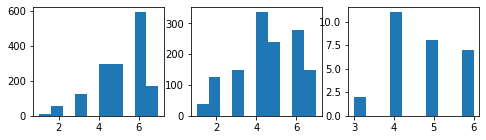

In [118]:
data['sclmeet'][data['cntry']=='CH']
data['sclmeet'][data['cntry']=='CZ']
data['sclmeet'][data['cntry']=='DE']

plt.figure(figsize=(8,2))
plt.subplot(1,3,1)
plt.hist(data['sclmeet'][data['cntry']=='CH'])

plt.subplot(1,3,2)
plt.hist(data['sclmeet'][data['cntry']=='CZ'])

plt.subplot(1,3,3)
plt.hist(data['sclmeet'][data['cntry']=='DE'])
    
print(stats.f_oneway(data['sclmeet'][data['cntry']=='CH'],
                     data['sclmeet'][data['cntry']=='CZ'],
                     data['sclmeet'][data['cntry']=='DE']))

#### There is a difference, since the p_value is less than 0.05

F_onewayResult(statistic=1.3838380815727098, pvalue=0.25094744196700947)


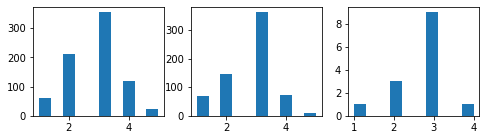

In [125]:
data['sclact'][(data['cntry']=='CH')&(data['year']==7)]
data['sclact'][(data['cntry']=='CZ')&(data['year']==7)]
data['sclact'][(data['cntry']=='DE')&(data['year']==7)]

plt.figure(figsize=(8,2))
plt.subplot(1,3,1)
plt.hist(data['sclact'][(data['cntry']=='CH')&(data['year']==7)])

plt.subplot(1,3,2)
plt.hist(data['sclact'][(data['cntry']=='CZ')&(data['year']==7)])

plt.subplot(1,3,3)
plt.hist(data['sclact'][(data['cntry']=='DE')&(data['year']==7)])
    
print(stats.f_oneway(data['sclact'][(data['cntry']=='CH')&(data['year']==7)],
                     data['sclact'][(data['cntry']=='CZ')&(data['year']==7)],
                     data['sclact'][(data['cntry']=='DE')&(data['year']==7)]))

#### there is no significant differences, since p_value is larger than 0.05